# Importing Libraries

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import treebank
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
import string
import spacy                                # For Name Entity Recognition
from spacy import displacy  
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/raghav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/raghav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/raghav/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /home/raghav/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Operating System Textbook


In [2]:
test1 = "Operating systems are an essential part of any computer system. Similarly,a course on operating systems is an essential part of any computer-science education. This field is undergoing rapid change, as computers are now prevalent in virtually every application, from games for children through the most sophisticated planning tools for governments and multinational firms. Yet the fundamental concepts remain fairly clear, and it is on these that we base this book"

In [3]:
file = open(r"OS.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
# wordslist = test1.split()
wordslist = [i for i in wordslist if i!='']
text = " ".join(wordslist)

In [4]:
len(text)

1760171

# Preprocessing


In [5]:
# import re
# #Creating a string which has all the punctuations to be removed
# punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext = text
# for i in punctuations:
#     if i != '-' :
#         cleantext = cleantext.replace(i,"")
#     else :
#         cleantext = cleantext.replace(i," ")


# #Converting the text into lower case         
# # cleantext = cleantext.lower()
# cleantext = re.sub(r'[ ]?this page intentionally left blank[ ]?','',cleantext)
# cleantext = re.sub(r'chapter[ ]?[0-9]+','',cleantext)
# cleantext = re.sub(r'figure[ ]?[0-9]+','',cleantext)
# cleantext = re.sub(r'preface','',cleantext)
# cleantext = re.sub(r'^m{0,3}(cm|cd|d?c{0,3})(xc|xl|l?x{0,3})(ix|iv|v?i{0,3})$','',cleantext)
# cleantext = re.sub(r'[ ]e[ ]','',cleantext)
# cleantext = re.sub(r'[0-9]+','',cleantext)
# cleantext = re.sub(r' www[a-z]+ ','',cleantext)
# cleantext = re.sub(r' [^aci] ','',cleantext)
# cleantext = re.sub(r'[ ]+',' ',cleantext)


In [6]:
# cleantext

In [7]:
len(cleantext)

1760171

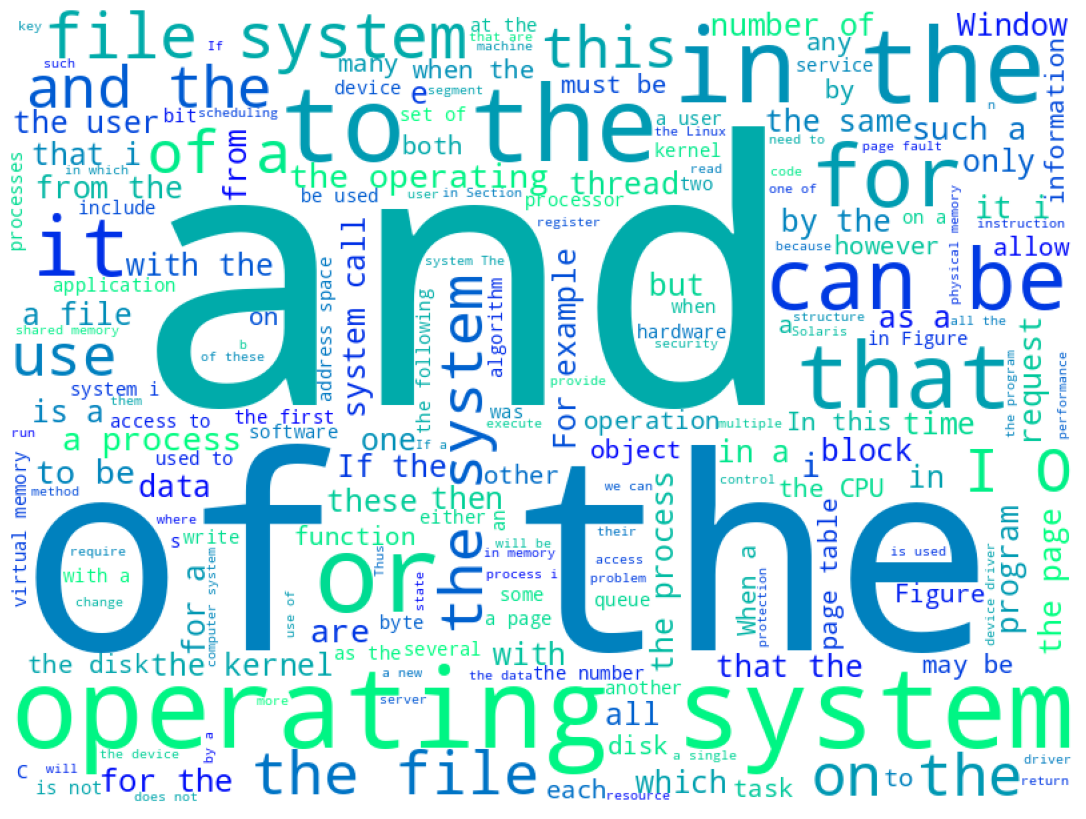

In [8]:
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(cleantext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

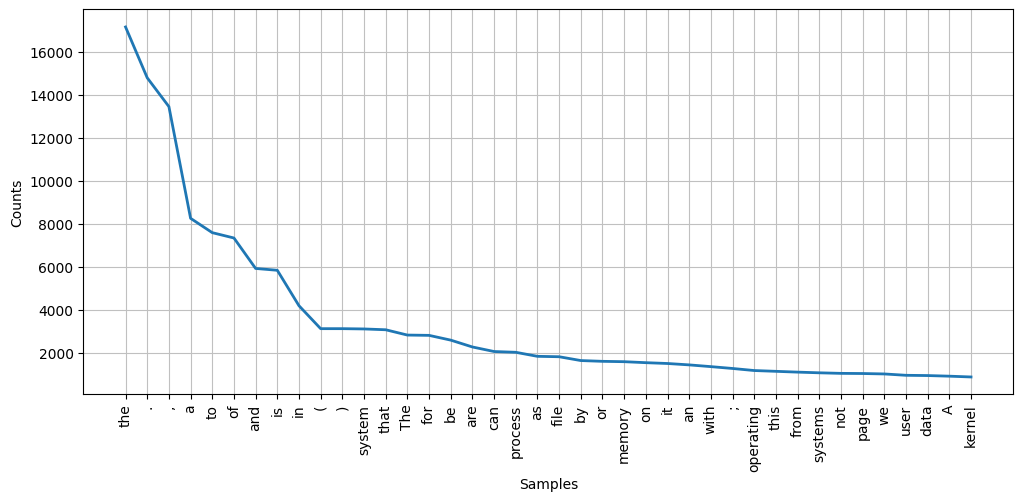

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [9]:
tokens = word_tokenize(cleantext)
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

### Removing stopwords and tokenising

In [10]:
# Removing stopwords and storing it into finaltext
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(cleantext)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = " "
finaltext = finaltext.join(tokens_final)

In [11]:
len(tokens)

327378

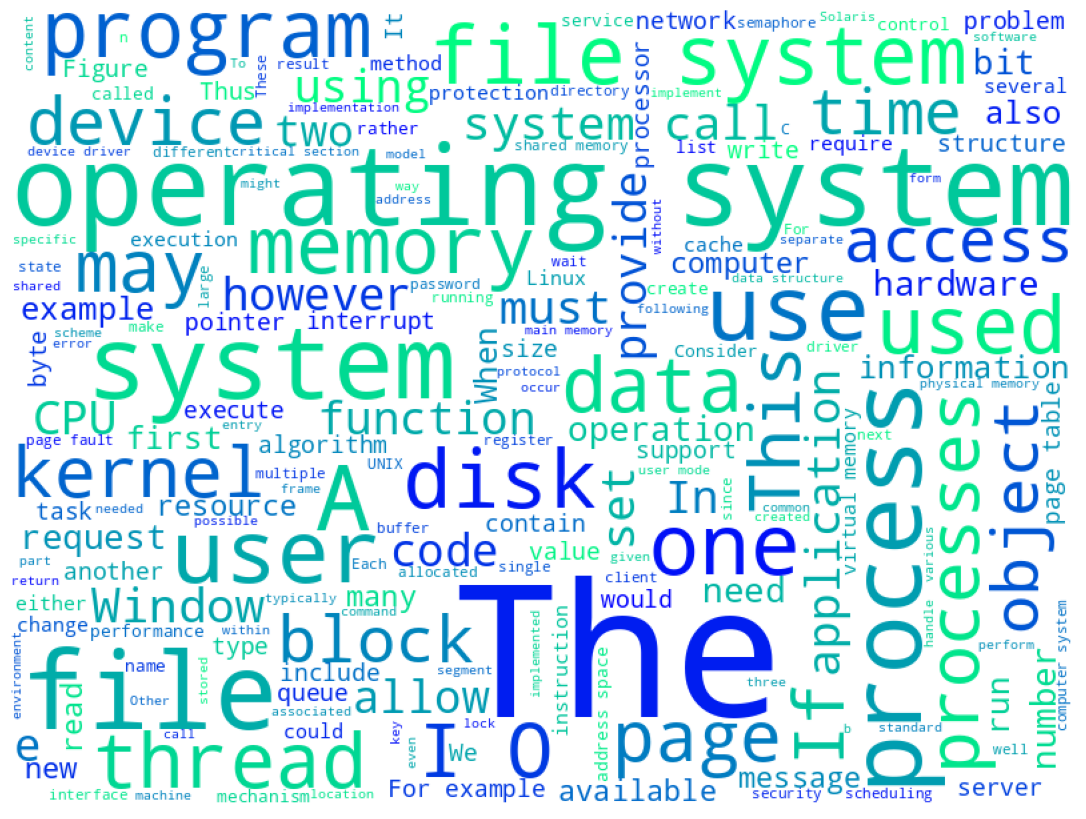

In [12]:
# Word cloud after removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Frequency distribution of tokens

222349


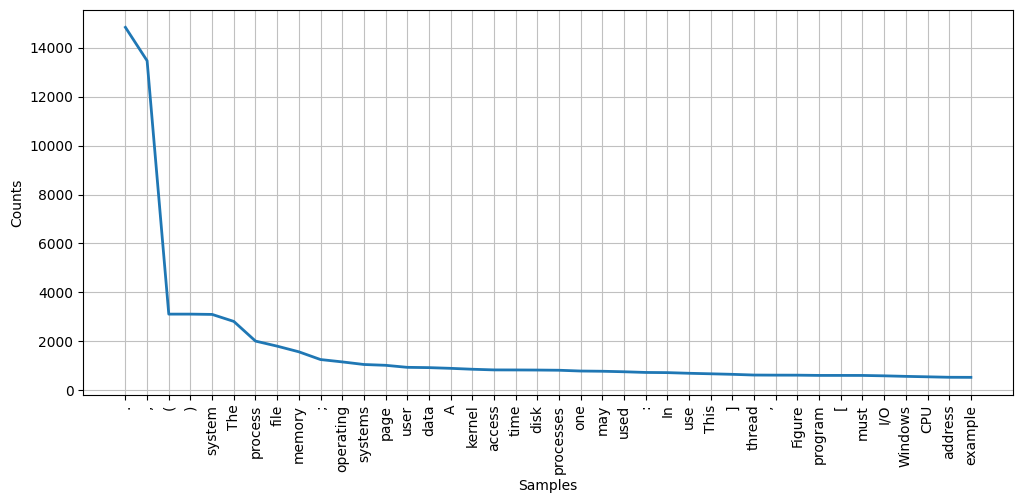

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [13]:
tokens = word_tokenize(finaltext)
print(len(tokens))
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

In [14]:
# tokens

In [15]:
tagged = nltk.pos_tag(tokens) 

In [16]:
from collections import Counter
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 58027, 'JJ': 26115, 'NNS': 19326, 'NNP': 17577, '.': 15360, ',': 13462, 'CD': 9220, 'VBG': 7009, 'RB': 6980, 'DT': 5560, 'VBD': 5258, 'VBZ': 5222, 'VBN': 5126, 'VBP': 4631, 'IN': 4293, 'VB': 4049, '(': 3291, ')': 3287, ':': 2130, 'MD': 2072, 'PRP': 750, 'CC': 610, 'WRB': 525, 'JJR': 524, 'JJS': 326, 'TO': 293, 'RBR': 214, 'WP': 192, 'NNPS': 184, 'FW': 147, '$': 124, '``': 122, 'EX': 86, '#': 67, 'RP': 52, 'PRP$': 30, 'WP$': 27, 'UH': 22, 'POS': 17, 'RBS': 13, 'SYM': 12, 'WDT': 11, "''": 4, 'PDT': 2})


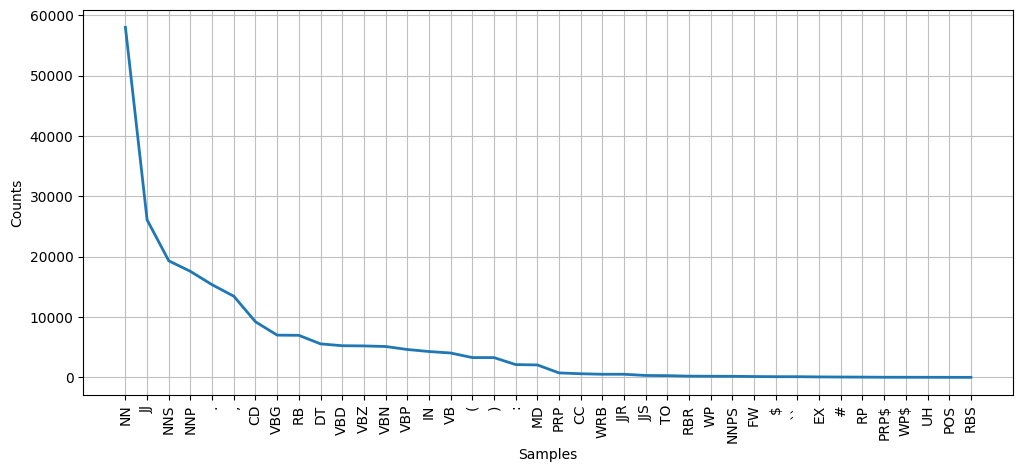

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [17]:
freq_tags = nltk.FreqDist(counts)
plt.figure(figsize=(12,5))
freq_tags.plot(40, cumulative=False)

## For word length vs Frequency distribution

In [18]:
import numpy as np
bin_size=np.linspace(0,25)

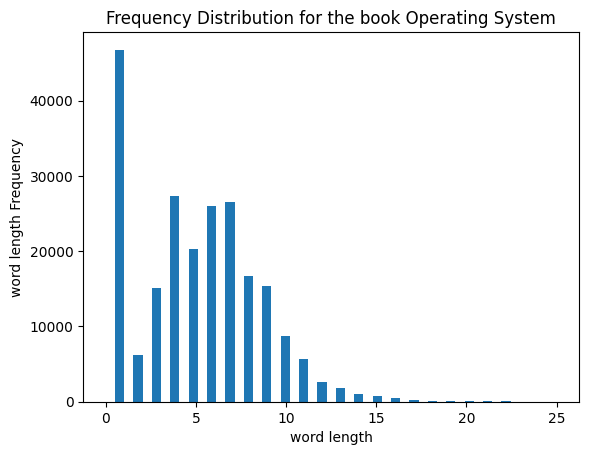

In [19]:
#Finding Wordlength and storing it as a list
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the book Operating System')
plt.show()


# Wordnet

In [20]:
# Storing all nouns and verbs
nouns = []
verbs = []
for i in range(len(tagged)):
    if tagged[i][1][0] == 'N':
        nouns.append(tagged[i][0])
    elif tagged[i][1][0] == 'V':
        verbs.append(tagged[i][0])


In [21]:
def wordnet_categorizer(*args):
  # First dictionary is for nouns
  # Second dictionary is for verbs
  dicts = ({}, {})

  for i in range(2):
    for tag in args[i]:
      syn = wn.synsets(tag)
      for s in syn:
        x = s.lexname()
        if x[0] == 'nv'[i]:
          if x in dicts[i]:
            dicts[i][x] += 1
          else:
            dicts[i][x] = 1

  return dicts


In [22]:
def bar_graph(dictionary, color):
    plt.bar(dictionary.keys(), dictionary.values(), color=color)
    y_pos = range(len(dictionary.keys()))
    plt.xticks(y_pos, dictionary.keys(), rotation=90)
    plt.show()
    cleantext

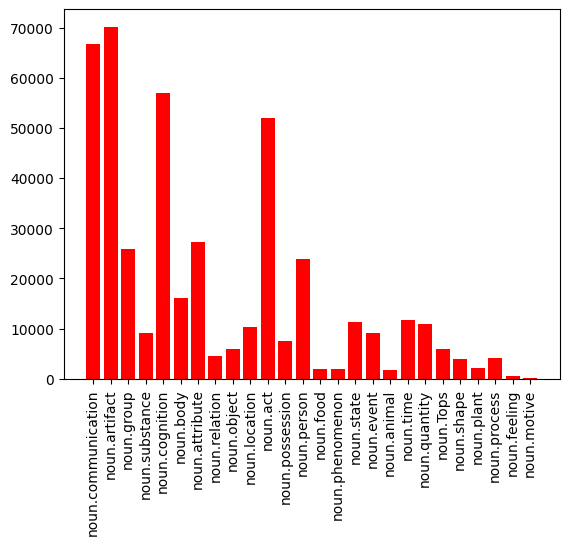

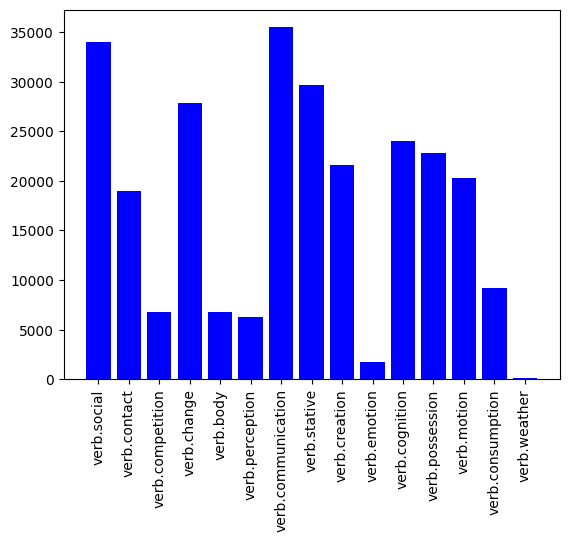

In [23]:
noun_dict, verb_dict = wordnet_categorizer(nouns, verbs)
bar_graph(noun_dict, 'r')
bar_graph(verb_dict, 'b')
plt.show()

# Part - 2

In [24]:
nlp = spacy.load("en_core_web_sm")
ner_lst = nlp.pipe_labels['ner']

#NER List available in spacy
print(len(ner_lst))
print(ner_lst)

18
['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


In [25]:

doc1 = nlp(cleantext[1000:3000])
for ent in doc1.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))


Java | PERSON | People, including fictional
first | ORDINAL | "first", "second", etc.
one | CARDINAL | Numerals that do not fall under another type
Sun Microsystems’ Solaris | ORG | Companies, agencies, institutions, etc.
Linux | GPE | Countries, cities, states
Microsoft | ORG | Companies, agencies, institutions, etc.
Windows XP | ORG | Companies, agencies, institutions, etc.
Apple Mac OS X. | ORG | Companies, agencies, institutions, etc.
Windows XP | ORG | Companies, agencies, institutions, etc.
Windows XP | PERSON | People, including fictional
Windows 2000 | ORG | Companies, agencies, institutions, etc.
Computing Curricula 2005 | PERSON | People, including fictional
the Joint Task Force | ORG | Companies, agencies, institutions, etc.
ACM | ORG | Companies, agencies, institutions, etc.


In [26]:
displacy.render(doc1, style="ent")

# Manual Labelling

In [27]:
diy_text = cleantext[1000:3000]

#Text on which manual labelling will be performed
print(diy_text)

 we use predominantly C, with some Java, but the reader can still understand the algorithms without a thorough knowledge of these languages. Concepts are presented using intuitive descriptions. Important theoretical results are covered, but formal proofs are omitted. The bibliographical notes at the end of each chapter contain pointers to research papers in which results were first presented and proved, as well as references to material for further reading. In place of proofs, figures and examples are used to suggest why we should expect the result in question to be true. The fundamental concepts and algorithms covered in the book are often based on those used in existing commercial operating systems. Our aim is to present these concepts and algorithms in a general setting that is not tied to one particular operating system. We present a large number of examples that pertain to the most popular and the most innovative operating systems, including Sun Microsystems’ Solaris; Linux; Micro

### Result of Manual Labelling                                

1. C | PRODUCT
1.  Java | PRODUCT
1.  first | ORDINAL 
1.  one | CARDINAL 
1.  Sun Microsystems Solaris | ORG
1.  Linux | PRODUCT 
1.  Microsoft | ORG
1.  Windows XP | PRODUCT
1.  Apple Mac OS X | PRODUCT
1.  Windows XP | PRODUCT
1.  Windows XP | PRODUCT
1.  Windows 2000| PRODUCT
1.  Computing Curricula 2005 | WORK_OF_ART
1. the Joint Task Force | ORG 
1.  ACM | ORG

## Calculation of F1 Score

In [28]:
#Confusion Matrices of each NER

ORG = {'TP': 4, 'TN': 0, 'FP': 4, 'FN': 0}

PRODUCT = {'TP': 0, 'TN': 0, 'FP': 0, 'FN':8 }

ORDINAL = {'TP': 1, 'TN': 0, 'FP': 0, 'FN':0}

CARDINAL = {'TP': 1, 'TN': 0, 'FP': 0, 'FN':0}

WORK_OF_ART = {'TP': 0, 'TN': 0, 'FP': 0, 'FN':1}

In [43]:
#Calculate Accuracy and F-Score

def calc(conf_matrix) :
    total = conf_matrix['TP'] + conf_matrix['TN'] + conf_matrix['FP'] + conf_matrix['FN']
    #Accuracy
    accuracy = (conf_matrix['TP'] + conf_matrix['TN'])/(total) 
    #F-Score
    if conf_matrix['TP'] + conf_matrix['FN'] == 0 :
        return {'acc' : accuracy, 'FS' : -1}
    else :
        recall = conf_matrix['TP']/(conf_matrix['TP'] + conf_matrix['FN'])
    if conf_matrix['TP'] + conf_matrix['FP'] == 0 :
        return {'acc' : accuracy, 'FS' : -1}
    else :
        precision = conf_matrix['TP']/(conf_matrix['TP'] + conf_matrix['FP'])
        
    if precision + recall == 0 :
        return {'acc' : accuracy, 'FS' : -1}
    else :     
        fscore = (2*precision*recall)/(precision+recall)
    return {'acc' : accuracy, 'FS' : fscore}

In [50]:
#For ORG
metrics = calc(ORG)
print("ORG - \n")
print("ACCURACY - ")
print( metrics['acc'])
print("F-score - ")
if metrics['FS'] == -1 :
    print("Cannot be Calculated \n")
else :
    print( metrics['FS'])
    print("\n")

#For PRODUCT
metrics = calc(PRODUCT)
print("PRODUCT - \n")
print("ACCURACY - ")
print( metrics['acc'])
print("F-score - ")
if metrics['FS'] == -1 :
    print("Cannot be Calculated \n")
else :
    print( metrics['FS'])
    print("\n")


#For ORDINAL
metrics = calc(ORDINAL)
print("ORDINAL - \n")
print("ACCURACY - ")
print( metrics['acc'])
print("F-score - ")
if metrics['FS'] == -1 :
    print("Cannot be Calculated \n")
else :
    print( metrics['FS'])
    print("\n")

#For CARDINAL
metrics = calc(CARDINAL)
print("CARDINAL - \n")
print("ACCURACY - ")
print( metrics['acc'])
print("F-score - ")
if metrics['FS'] == -1 :
    print("Cannot be Calculated \n")
else :
    print( metrics['FS'])
    print("\n")

#For WORK_OF_ART
metrics = calc(WORK_OF_ART)
print("WORK_OF_ART - \n")
print("ACCURACY - ")
print( metrics['acc'])
print("F-score - ")
if metrics['FS'] == -1 :
    print("Cannot be Calculated \n")
else :
    print( metrics['FS'])

ORG - 

ACCURACY - 
0.5
F-score - 
0.6666666666666666


PRODUCT - 

ACCURACY - 
0.0
F-score - 
Cannot be Calculated 

ORDINAL - 

ACCURACY - 
1.0
F-score - 
1.0


CARDINAL - 

ACCURACY - 
1.0
F-score - 
1.0


WORK_OF_ART - 

ACCURACY - 
0.0
F-score - 
Cannot be Calculated 

